# Detection and Classification of People With and Without Masks in Images
## Exploratory Data Analysis

In [1]:
# Import Packages
import os
import re
import tensorflow as tf
import pandas as pd

from bs4 import BeautifulSoup as soup
from PIL import Image

import matplotlib.pyplot as plot
import matplotlib.patches as patches



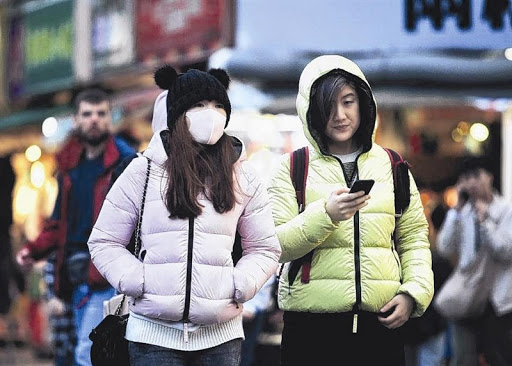

In [2]:
# Sample Image
with Image.open("../Data/images/maksssksksss0.png") as rawImage:
    display(rawImage)


In [3]:
# Sample Annotation
with open("../Data/annotations/maksssksksss0.xml") as annotation:
    rawXML = annotation.read()
    print(rawXML)



<annotation>
    <folder>images</folder>
    <filename>maksssksksss0.png</filename>
    <size>
        <width>512</width>
        <height>366</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>79</xmin>
            <ymin>105</ymin>
            <xmax>109</xmax>
            <ymax>142</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>185</xmin>
            <ymin>100</ymin>
            <xmax>226</xmax>
            <ymax>144</ymax>
        </bndbox>
    </object>
    <object>
        <name>without_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</

In [4]:
# Data Extraction Function
def Extract(path):
    # Safely open annotation
    with open(path) as annotation:
        # Read annotation with Beautiful Soup
        rawXML = annotation.read()
        bsXML = soup(rawXML,"xml")

        # Stores Metadata in a Dictionary
        meta = {}
        size = bsXML.find('size')
        meta['index']=int(re.search(r'\d+',path).group())
        meta['width'] = int(size.find('width').get_text())
        meta['height'] = int(size.find('height').get_text())
        meta['depth'] = int(size.find('depth').get_text())

        # Stores Labels in a List of Dictionaries
        faces = []
        objects = bsXML.find_all('object')
        for face in objects:
            labels={}
            labels['index']=meta['index']
            labels['label'] = face.find('name').get_text()
            labels['pose'] = face.find('pose').get_text()
            labels['truncated'] = int(face.find('truncated').get_text())
            labels['occluded'] = int(face.find('occluded').get_text())
            labels['difficult'] = int(face.find('difficult').get_text())
            labels['xmin'] = int(face.find('xmin').get_text())
            labels['xmax'] = int(face.find('xmax').get_text())
            labels['ymin'] = int(face.find('ymin').get_text())
            labels['ymax'] = int(face.find('ymax').get_text())
            faces.append(labels)
        return(meta,faces)

In [5]:
# Extract data from sample
meta,faces = Extract("../Data/annotations/maksssksksss0.xml")
print("Metadata: ")
print(meta)
print("Face Objects: ")
print(faces)

Metadata: 
{'index': 0, 'width': 512, 'height': 366, 'depth': 3}
Face Objects: 
[{'index': 0, 'label': 'without_mask', 'pose': 'Unspecified', 'truncated': 0, 'occluded': 0, 'difficult': 0, 'xmin': 79, 'xmax': 109, 'ymin': 105, 'ymax': 142}, {'index': 0, 'label': 'with_mask', 'pose': 'Unspecified', 'truncated': 0, 'occluded': 0, 'difficult': 0, 'xmin': 185, 'xmax': 226, 'ymin': 100, 'ymax': 144}, {'index': 0, 'label': 'without_mask', 'pose': 'Unspecified', 'truncated': 0, 'occluded': 0, 'difficult': 0, 'xmin': 325, 'xmax': 360, 'ymin': 90, 'ymax': 141}]


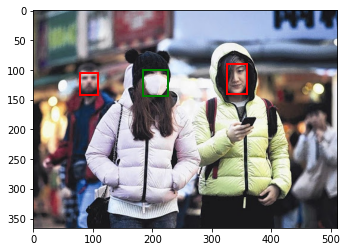

In [6]:
# Show labels on Image
with Image.open("../Data/images/maksssksksss0.png") as rawImage:
    figure, axis = plot.subplots()
    axis.imshow(rawImage)
    meta,objects = Extract("../Data/annotations/maksssksksss0.xml")
    for face in objects:
        color = 'green' if face['label']=='with_mask' else 'red'
        corner = (face['xmin'],face['ymin'])
        width = face['xmax']-face['xmin']
        height = face['ymax']-face['ymin']
        rect = patches.Rectangle(corner, width, height, linewidth=2, edgecolor=color, facecolor='none')
        axis.add_patch(rect)
    plot.show()

In [7]:
# Collect Samples
imagePath = "../Data/images/"
imagesList = [[int(re.search(r'\d+',os.path.join(imagePath,f)).group()),os.path.join(imagePath,f)] for f in os.listdir(imagePath) if os.path.isfile(os.path.join(imagePath,f))]
images = pd.DataFrame(imagesList,columns=['index','path']).set_index('index')

# Collect Labels
annotationpath = "../Data/annotations/"
metaList=[]
facesList=[]
for f in os.listdir(annotationpath):
    path = os.path.join(annotationpath,f)
    meta, faces = Extract(path)
    metaList.append(meta)
    facesList=facesList+faces
meta = pd.DataFrame(metaList).set_index('index')
labels = pd.DataFrame(facesList).set_index('index')

In [8]:
# Metadata Summary Statistics
meta.describe()

,width,height,depth
count,853.000000,853.000000,853.0
mean,370.589683,309.289566,3.0
std,56.224049,74.474840,0.0
min,193.000000,156.000000,3.0
25%,301.000000,254.000000,3.0
50%,400.000000,280.000000,3.0
75%,400.000000,400.000000,3.0
max,600.000000,600.000000,3.0


Most images of the same size:
     height  width  count
115     400    301    184


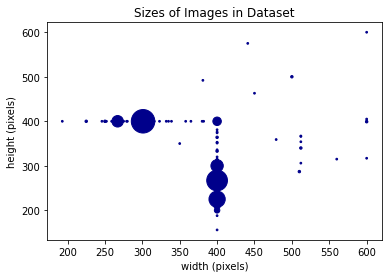

In [9]:
# Explore Image Sizes
groupedMeta = meta.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
print("Most images of the same size:")
print(groupedMeta[groupedMeta['count']==groupedMeta['count'].max()])
plot.scatter(groupedMeta['width'],groupedMeta['height'],c='darkblue',s=3*groupedMeta['count'])
plot.xlabel('width (pixels)')
plot.ylabel('height (pixels)')
plot.title('Sizes of Images in Dataset')
plot.show()

In [10]:
# Labels Summary Statistics
nlabels = len(labels)
nWithMask = len(labels[labels['label']=='with_mask'])
nWithoutMask = len(labels[labels['label']=='without_mask'])
nIncorrectMask = len(labels[labels['label']=='mask_weared_incorrect'])
nOther = nlabels - nWithMask - nWithoutMask - nIncorrectMask
labelTable = pd.DataFrame([
    ["With","{:.1f}".format(100*nWithMask/nlabels)+'%'],
    ["Without","{:.1f}".format(100*nWithoutMask/nlabels)+"%"],
    ["Incorrect","{:.1f}".format(100*nIncorrectMask/nlabels)+"%"]],columns=["Mask Label","Label Classifications ("+str(nlabels)+" Total Labels)"]).set_index("Mask Label")
labelTable

,Label Classifications (4072 Total Labels)
Mask Label,
With,79.4%
Without,17.6%
Incorrect,3.0%


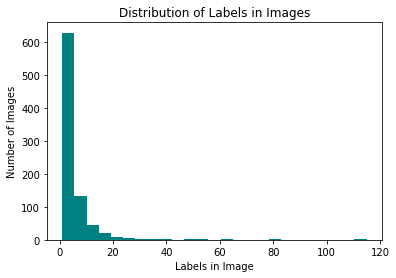

In [11]:
# Explore Number of Labels per Image
groupedLabels = labels.groupby(by='index').size()
plot.hist(groupedLabels,bins=25,color='teal')
plot.xlabel('Labels in Image')
plot.ylabel('Number of Images')
plot.title('Distribution of Labels in Images')
plot.show()

In [12]:
# Look into other label variables
print(labels.groupby(by='pose').size())
labels.describe()

pose
Unspecified    4072
dtype: int64


,truncated,occluded,difficult,xmin,xmax,ymin,ymax
count,4072.0,4072.0,4072.0,4072.000000,4072.000000,4072.000000,4072.000000
mean,0.0,0.0,0.0,182.207024,213.356090,85.780697,120.785609
std,0.0,0.0,0.0,104.471254,102.712267,52.571821,70.355098
min,0.0,0.0,0.0,1.000000,8.000000,1.000000,6.000000
25%,0.0,0.0,0.0,96.000000,134.000000,49.000000,73.000000
50%,0.0,0.0,0.0,177.000000,212.000000,75.000000,103.000000
75%,0.0,0.0,0.0,266.000000,292.000000,113.000000,148.000000
max,0.0,0.0,0.0,569.000000,592.000000,330.000000,495.000000
